# WeatherPy
----

## Setting up libraries 

In [1]:
# Uncomment below to install citipy 0.0.5 python library
# pip install citipy

In [28]:
# Libraries and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# Make empty lists to create a random list of cities and its lat and long
lat_lngs = []
cities = []

# Use the .random.uniform function to create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Use the for loop to identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Call on API from OpenWeatherMap 
base_url = "http://api.openweathermap.org/data/2.5/weather"
example_city = "London"

In [7]:
# Build query URL
query_url = f"{base_url}?units=Imperial&appid={weather_api_key}" + f"&q={example_city}"
query_url


response = requests.get(url)
response # Note Response [400] is because we did not define a specific city id for the URL to research


response_json = response.json()
response_json

{'cod': '400', 'message': 'Nothing to geocode'}

In [8]:
# Alternative, using params dictionary
parameters = {
    'appid': weather_api_key,
    'q': example_city
}

In [9]:
# Grab weather data
weather_response = requests.get(url=base_url, params=parameters)

weather_json = weather_response.json()

print(f"The weather API responed with: {json.dumps(weather_json, indent=2)}.")

The weather API responed with: {
  "coord": {
    "lon": -0.1257,
    "lat": 51.5085
  },
  "weather": [
    {
      "id": 804,
      "main": "Clouds",
      "description": "overcast clouds",
      "icon": "04d"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 293.11,
    "feels_like": 292.88,
    "temp_min": 290.03,
    "temp_max": 294.23,
    "pressure": 1024,
    "humidity": 66
  },
  "visibility": 10000,
  "wind": {
    "speed": 2.9,
    "deg": 223,
    "gust": 5.18
  },
  "clouds": {
    "all": 100
  },
  "dt": 1623092780,
  "sys": {
    "type": 2,
    "id": 2019646,
    "country": "GB",
    "sunrise": 1623037511,
    "sunset": 1623096831
  },
  "timezone": 3600,
  "id": 2643743,
  "name": "London",
  "cod": 200
}.


### Great API is working, next we need to use a for loop to grab each random city from the random list we created!

####  The format of the data will be:
- Processing Record 1 of Set 1 | [city name entered]
- Each set has a record of 50. Set 2 will begin after segments of 50s. 
- City names that are not found will be noted: (f"{cities_list} not found in this dataset")

In [10]:
# Call on API from OpenWeatherMap 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Create an empty list to input the ramdom list of city
cities_list = []

## For the statement "Processing RECORD [1] of SET [1]" create a starting point for the for loop
begin_record = 1
begin_set = 1

# Set the number of sets created
for count, city in enumerate(cities):
    
    if (count % 50 == 0 and count >= 50): #the count for each row 
        begin_set += 1 #this is to continue adding on to the current number by 1 
        begin_record = 0 #this is to start the recound count all over again 
   
    # Create query url that goes through the cities API
    city_url = f"{base_url}?units=Imperial&appid={weather_api_key}" + f"&q={city}"
    
    print(f"Processing Record {begin_record} of Set {begin_set} | {city}")
    
    # Add 1 to the record count
    begin_record += 1
    
    # Run an API request for each of the cities
    try:
        
        # set up lists to hold response info
        coord_lat = []
        coord_lng = []
        main_temp_max = []
        main_humidity = []
        clouds_all = []
        wind_speed = []
        sys_country = []
        dt = []
        
        # Retrieve data
        city_data = requests.get(city_url).json()
        
        # Append the specific data
        coord_lat = city_data["coord"]["lat"]
        coord_lon = city_data["coord"]["lon"]
        main_temp_max = city_data["main"]["temp_max"]
        main_humidity = city_data["main"]["humidity"]
        clouds_all = city_data["clouds"]["all"]
        wind_speed = city_data["wind"]["speed"]
        sys_country = city_data["sys"]["country"]
        dt = city_data["dt"]
        
#         coord_lat.append(city_weather["coord"]["lat"])
#         coord_lon.append(city_weather["coord"]["lon"])
#         main_temp_max.append(city_weather["main"]["temp_max"])
#         main_humidity.append(city_weather["main"]["humidity"])
#         clouds_all.append(city_weather["clouds"]["all"])
#         wind_speed.append(city_weather["wind"]["speed"])
#         sys_country.append(city_weather["sys"]["country"])
#         dt.append(city_weather["dt"])
        

        # Append the city information into cities_list list
        cities_list.append({"City": city, 
                            "Lat": coord_lat, 
                            "Lng": coord_lon, 
                            "Max Temp": main_temp_max,
                            "Humidity": main_humidity,
                            "Cloudiness": clouds_all,
                            "Wind Speed": wind_speed,
                            "Country": sys_country,
                            "Date": dt})
    # Skipping cities when not found
    except KeyError:
        print(f"City not found in this dataset")
        pass

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | kirkwall
Processing Record 3 of Set 1 | nishihara
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | port hawkesbury
Processing Record 7 of Set 1 | bengkulu
Processing Record 8 of Set 1 | zwedru
Processing Record 9 of Set 1 | garowe
Processing Record 10 of Set 1 | nouadhibou
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | praia da vitoria
Processing Record 14 of Set 1 | makinsk
Processing Record 15 of Set 1 | rawannawi
City not found in this dataset
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | wajid
Processing Record 19 of Set 1 | sondrio
Processing Record 20 of Set 1 | trinidad
Processing Record 21 of Set 1 | barentsburg
City not found in this dataset
Processing Record 22 of Set 1 | hithadhoo
Processing Record 23 of Set 1 

In [11]:
# Convert array of JSONs into Pandas DataFrame
city_df = pd.DataFrame(cities_list)
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,79.20,73,29,8.39,PF,1623093287
1,kirkwall,58.9848,-2.9587,55.74,87,90,11.50,GB,1623093287
2,nishihara,26.1842,127.7558,79.88,89,75,8.55,JP,1623093287
3,bredasdorp,-34.5322,20.0403,65.28,44,100,5.68,ZA,1623093288
4,jamestown,42.0970,-79.2353,87.12,56,1,7.00,US,1623093195
...,...,...,...,...,...,...,...,...,...
560,taunggyi,20.7833,97.0333,66.40,90,100,1.54,MM,1623093550
561,wanning,18.8003,110.3967,80.60,87,100,5.88,CN,1623093550
562,bilma,18.6853,12.9164,96.67,13,100,4.79,NE,1623093550
563,mareeba,-17.0000,145.4333,65.12,96,48,2.21,AU,1623093551


In [12]:
# Save to csv
city_df.to_csv("../cities.csv")

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Show Record Count
city_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [14]:
# Display the City Data Frame
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,79.20,73,29,8.39,PF,1623093287
1,kirkwall,58.9848,-2.9587,55.74,87,90,11.50,GB,1623093287
2,nishihara,26.1842,127.7558,79.88,89,75,8.55,JP,1623093287
3,bredasdorp,-34.5322,20.0403,65.28,44,100,5.68,ZA,1623093288
4,jamestown,42.0970,-79.2353,87.12,56,1,7.00,US,1623093195
...,...,...,...,...,...,...,...,...,...
560,taunggyi,20.7833,97.0333,66.40,90,100,1.54,MM,1623093550
561,wanning,18.8003,110.3967,80.60,87,100,5.88,CN,1623093550
562,bilma,18.6853,12.9164,96.67,13,100,4.79,NE,1623093550
563,mareeba,-17.0000,145.4333,65.12,96,48,2.21,AU,1623093551


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# check if there are any cities that have humidity > 100% 
a = city_df['Humidity'] > 100
city_df['Humidity'].max() #no cities have the humidity > 100%

100

In [16]:
city_df['Humidity'].dtypes

dtype('int64')

In [17]:
## Create dataframe of the cities tha are under 100 or equal to 100
no_humid_city = city_df.loc[(city_df["Humidity"] <= 100)]                         
no_humid_city

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,79.20,73,29,8.39,PF,1623093287
1,kirkwall,58.9848,-2.9587,55.74,87,90,11.50,GB,1623093287
2,nishihara,26.1842,127.7558,79.88,89,75,8.55,JP,1623093287
3,bredasdorp,-34.5322,20.0403,65.28,44,100,5.68,ZA,1623093288
4,jamestown,42.0970,-79.2353,87.12,56,1,7.00,US,1623093195
...,...,...,...,...,...,...,...,...,...
560,taunggyi,20.7833,97.0333,66.40,90,100,1.54,MM,1623093550
561,wanning,18.8003,110.3967,80.60,87,100,5.88,CN,1623093550
562,bilma,18.6853,12.9164,96.67,13,100,4.79,NE,1623093550
563,mareeba,-17.0000,145.4333,65.12,96,48,2.21,AU,1623093551


In [18]:
# Export the City_Data into a csv
no_humid_city.to_csv("no_humid_city.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

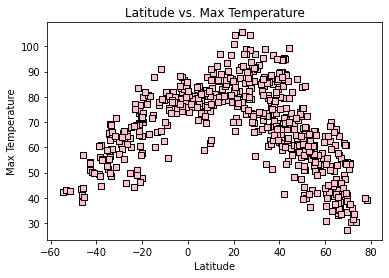

In [113]:
# Content
lat = no_humid_city["Lat"]
max_temp = no_humid_city["Max Temp"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lat, 
            max_temp,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)

# Details for the graph
plt.title("Latitude vs. Max Temperature")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/Lat&Temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

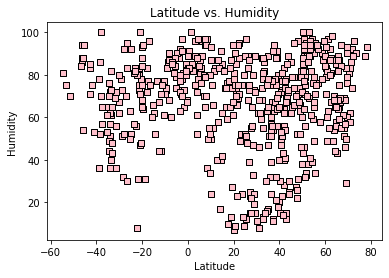

In [114]:
# Content
lat = no_humid_city["Lat"]
humidity = no_humid_city["Humidity"]

# Build the scatter plots for latitude vs. humidity
plt.scatter(lat, 
            humidity,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)

# Details for the graph
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/Lat&Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

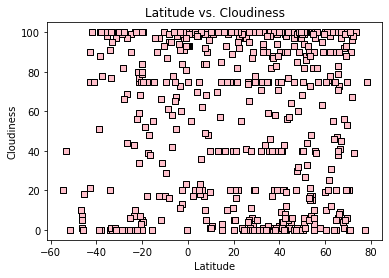

In [115]:
# Content
lat = no_humid_city["Lat"]
cloudiness = no_humid_city["Cloudiness"]

# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat, 
            cloudiness,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)

# Details for the graph
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/Lat&Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

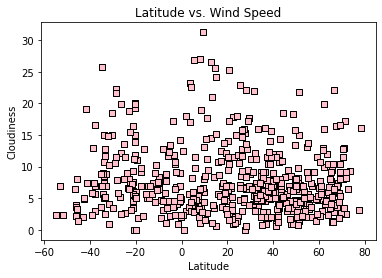

In [116]:
# Extract relevant fields from the data frame
lat = no_humid_city["Lat"]
wind_speed = no_humid_city["Wind Speed"]

# Build the scatter plots for latitude vs. wind speed
plt.scatter(no_humid_city["Lat"], 
            no_humid_city["Wind Speed"],
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)

# Details for the graph
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/Lat&WindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [117]:
# Linear Regression set up


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
print(regress_values)

1      56.225972
2      77.067806
4      66.956651
5      64.720071
7      89.850670
         ...    
559    49.977031
560    80.499593
561    81.759611
562    81.832683
564    65.890433
Name: Lat, Length: 409, dtype: float64


In [118]:
# Linear Regression set up
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
south_regress_values = x_values * slope + intercept 
print(south_regress_values)

1      56.225972
2      77.067806
4      66.956651
5      64.720071
7      89.850670
         ...    
559    49.977031
560    80.499593
561    81.759611
562    81.832683
564    65.890433
Name: Lat, Length: 409, dtype: float64


In [119]:
# Create line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
print(line_eq)

y = -0.64x +93.71


In [120]:
# Create Northern and Southern Hemisphere DataFrames
north_hemp_df = no_humid_city.loc[(no_humid_city["Lat"] >= 0)]
south_hemp_df = no_humid_city.loc[(no_humid_city["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5307450757986647


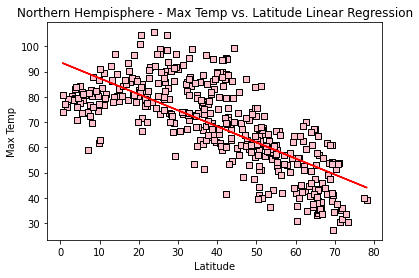

In [121]:
# Linear regression on Northern Hemisphere
north_hemp_x = north_hemp_df["Lat"]
norht_hemp_y = north_hemp_df["Max Temp"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hemp_x, norht_hemp_y)
regress_values = north_hemp_x * slope + intercept 

# Plot 
plt.scatter(north_hemp_x, 
            norht_hemp_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(north_hemp_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Northern Hempisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/NorthernMaxTemp&Latitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6714232111844539


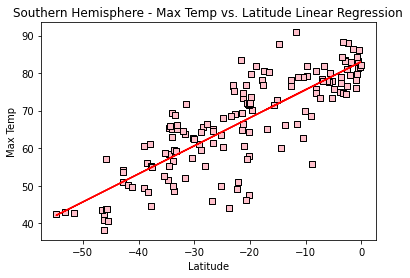

In [122]:
# Linear regression on Southern Hemisphere
south_hemi_x = south_hemp_df["Lat"]
south_hemi_y = south_hemp_df["Max Temp"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hemi_x, south_hemi_y)
regress_values = south_hemi_x * slope + intercept 

# Plot 
plt.scatter(south_hemi_x, 
            south_hemi_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(south_hemi_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/SoutherMaxTemp&Latitute.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00498521708830501


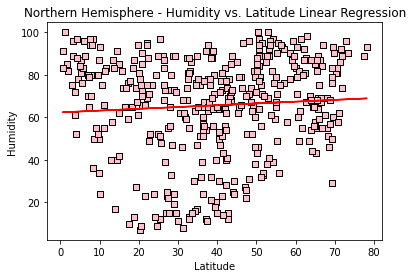

In [123]:
# Northern Hemisphere
north_hum_x = north_hemp_df["Lat"]
north_hum_y = north_hemp_df["Humidity"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hum_x, north_hum_y)
regress_values = north_hum_x * slope + intercept 

# Plot 
plt.scatter(north_hum_x, 
            north_hum_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(north_hum_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/NorthernHumidity&Latitute.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0344487699656845


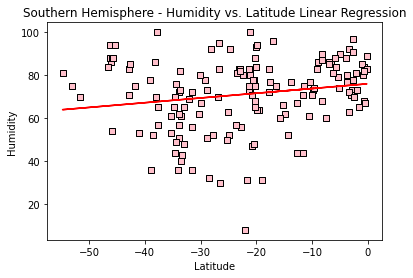

In [124]:
# Southern Hemisphere
south_hum_x = south_hemp_df["Lat"]
south_hum_y = south_hemp_df["Humidity"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hum_x, south_hum_y)
regress_values = south_hum_x * slope + intercept 


# Plot 
plt.scatter(south_hum_x, 
            south_hum_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(south_hum_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/SouthernHumidity&Latitute.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002579887183209189


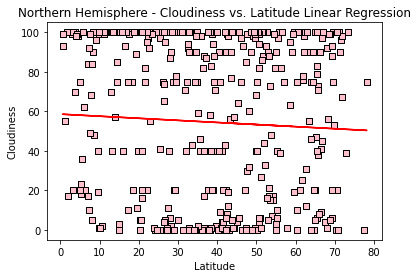

In [125]:
# Northern Hemisphere
north_cld_x = north_hemp_df["Lat"]
south_cld_y = north_hemp_df["Cloudiness"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_cld_x, south_cld_y)
regress_values = north_cld_x * slope + intercept 

# Plot 
plt.scatter(north_cld_x, 
            south_cld_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(north_cld_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/NorthernCloudiness&Latitute.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06410171654287854


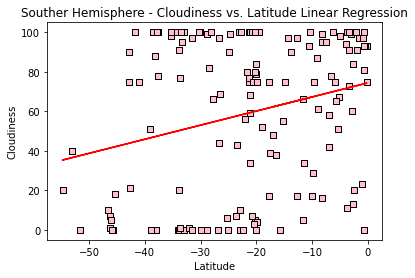

In [126]:
# Southern Hemisphere
south_cld_x = south_hemp_df["Lat"]
south_cld_y = south_hemp_df["Cloudiness"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_cld_x, south_cld_y)
regress_values = south_cld_x * slope + intercept 

# Plot 
plt.scatter(south_cld_x, 
            south_cld_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(south_cld_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Souther Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/SouthernCloudiness&Latitute.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023329389427619054


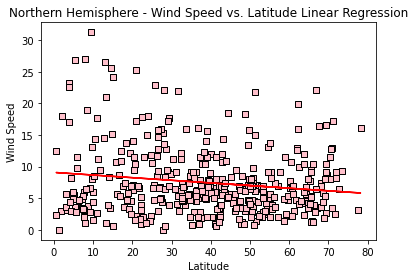

In [127]:
# Northern Hemisphere
north_wind_x = north_hemp_df["Lat"]
north_wind_y = north_hemp_df["Wind Speed"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_wind_x, north_wind_y)
regress_values = north_wind_x * slope + intercept 


# Plot 
plt.scatter(north_wind_x, 
            north_wind_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(north_wind_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/NorthernWindSpeed&Latitute.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002692378674759648


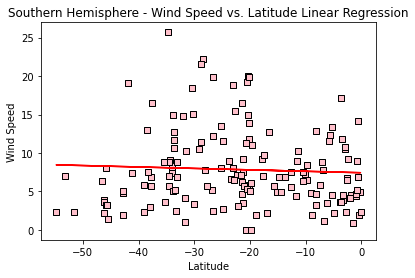

In [128]:
# Southern Hemisphere
south_wind_x = south_hemp_df["Lat"]
south_wind_y = south_hemp_df["Wind Speed"]

# Line Regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_wind_x, south_wind_y)
regress_values = south_wind_x * slope + intercept 

# Plot 
plt.scatter(south_wind_x, 
            south_wind_y,
            c="pink",
            edgecolor ="black",
            marker="s", 
            alpha=1)
plt.plot(south_wind_x, regress_values, "r-")
print(f"The r-squared is: {rvalue**2}")

# Details for the graph
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("graphs/SouthernWindSpeed&Latitute.png")

# Show plot
plt.show()

# Mini Analysis

-  For Part I, you must include a written description of three observable trends based on the data.

### Out of the 12 graphs that have been created, three of the most notiable ones are:
- 